## Header Material and Helper Functions

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def normalize(M):
    rows,cols = M.shape
    for i in range(cols):
        col_norm = la.norm(M[:,i])
        if col_norm != 0:
            M[:,i] = M[:,i]/col_norm
    return M

In [3]:
def matrix_to_latex(M):
    return sp.latex(sp.Matrix(M))

In [4]:
# Make data for the unit sphere and circle
u = np.array([np.linspace(0, 2 * np.pi, 1000)])
v = np.linspace(0, np.pi, 1000)
X = np.outer(np.cos(u), np.sin(v))
Y = np.outer(np.sin(u), np.sin(v))
Z = np.outer(np.ones(np.size(u)), np.cos(v))
circle = np.array([np.cos(u)[0],np.sin(u)[0]])

## $m\times n$ with $m<n$

In [24]:
# This example is from chapter 7.4 in Lay's Linear Algebra Text
A = np.array([[4,11,14],[8,7,-2]])

In [25]:
sphere_array = np.array([X.reshape(1000**2),Y.reshape(1000**2),Z.reshape(1000**2)])
image_array = A@sphere_array


In [26]:
# calculate A^tA, a symmetric matrix
B = A.transpose()@A
B_eigvals, B_eigvecs = la.eig(B)


In [27]:
image_vecs = (A@B_eigvecs)[:,[0,2]]
image_data = image_vecs@circle

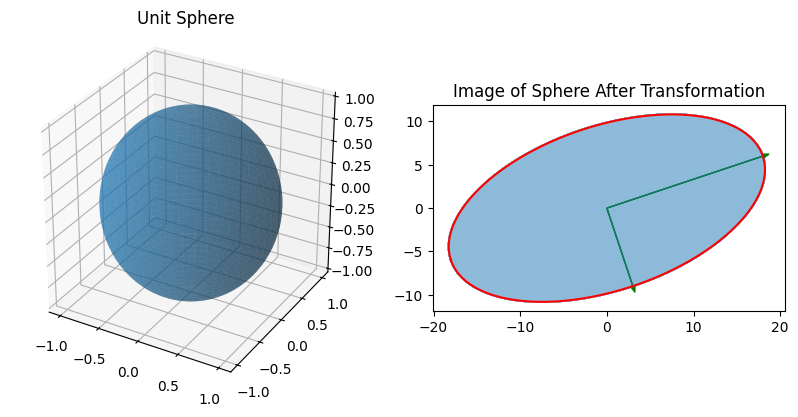

In [29]:
figure1 = plt.figure(figsize=(10,5))

# add axes to the figure
axis11 = figure1.add_subplot(121,projection='3d')
axis12 = figure1.add_subplot(122)

# set aspect ratios
axis11.set_aspect('equal')
axis12.set_aspect('equal')

# set titles
axis11.set_title("Unit Sphere")
axis12.set_title("Image of Sphere After Transformation")

# add images to the axes
axis11.plot_surface(X,Y,Z,alpha=0.5)
axis12.plot(image_array[0],image_array[1],alpha=0.5);
axis12.plot(image_data[0],image_data[1],'r');

# image vectors
axis12.arrow(0,0,18,6,color='g',head_width=0.5)
axis12.arrow(0,0,3,-9,color='g',head_width=0.5)

In [11]:
# sort the eigen values from greatest to least
idx  = B_eigvals.argsort()[::-1]
B_eigvals = B_eigvals[idx]
B_eigvecs = B_eigvecs[:,idx]

In [12]:
# set up the components of the svd
V = B_eigvecs
D = np.sqrt(np.diag(B_eigvals).round(10))
U = (A@B_eigvecs).round(10)
U = normalize(U).round(10)

In [13]:
print("Here is A \n%s \n versus the result of the SVD \n%s"%(A,U@D@V.transpose()))

Here is A 
[[ 4 11 14]
 [ 8  7 -2]] 
 versus the result of the SVD 
[[ 4. 11. 14.]
 [ 8.  7. -2.]]


In [14]:
print(la.svd(A))

SVDResult(U=array([[-0.9486833 , -0.31622777],
       [-0.31622777,  0.9486833 ]]), S=array([18.97366596,  9.48683298]), Vh=array([[-0.33333333, -0.66666667, -0.66666667],
       [ 0.66666667,  0.33333333, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]]))


## $m\times n$ with $m>n$

In [15]:
C = np.array([[0,1],[1,1],[0,1]])
C_prod = np.matmul(C.transpose(),C)
c_eigval,c_eigvecs = la.eig(C_prod)
print(c_eigvecs,"\n\n",c_eigval)

[[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]] 

 [0.58578644 3.41421356]


In [16]:
idx = c_eigval.argsort()[::-1]
c_eigval = c_eigval[idx]
c_eigvecs = c_eigvecs[:,idx]
c_eigvecs = c_eigvecs*-1

In [17]:
U = normalize(C@c_eigvecs)
D = np.sqrt(np.diag(c_eigval))
Vt = c_eigvecs.transpose()

In [18]:
print("Here is C \n%s \n versus the result of the SVD \n%s"%(C,(U@D@Vt).round(15)))

Here is C 
[[0 1]
 [1 1]
 [0 1]] 
 versus the result of the SVD 
[[-0.  1.]
 [ 1.  1.]
 [-0.  1.]]


In [19]:
# create lists of points for plotting the eigenvectors and their images
T = np.array([np.linspace(0,1,10)])
v1 = np.array([c_eigvecs[:,0]]).transpose()
v2 = np.array([c_eigvecs[:,1]]).transpose()
plot_v1 = v1@T
plot_v2 = v2@T
image_v1 = C@plot_v1
image_v2 = C@plot_v2
print(np.cross(U[:,0],U[:,1]))

[-0.70710678  0.          0.70710678]


In [20]:
# transformation of the unit circle by C
circle_image = np.matmul(C,circle)
circle_image.shape

(3, 1000)

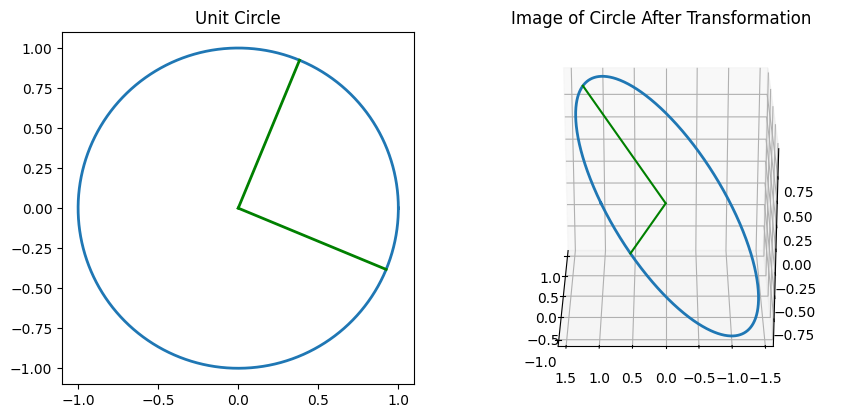

In [21]:
figure2 = plt.figure(figsize=(10,6))
# add axes to the figure
axis211 = figure2.add_subplot(121)
axis212 = figure2.add_subplot(122,projection='3d')

# set aspect ratios
axis211.set_aspect('equal')
axis212.set_aspect('equal')

# set titles
axis211.set_title("Unit Circle")
axis212.set_title("Image of Circle After Transformation")

# add images to the axes
axis211.plot(circle[0],circle[1],linewidth=2)
axis212.plot(circle_image[0],circle_image[1],circle_image[2],linewidth=2)

# add vectors
axis211.plot(plot_v1[0],plot_v1[1],'g',linewidth=2)
axis211.plot(plot_v2[0],plot_v2[1],'g',linewidth=2)
axis212.plot(image_v1[0],image_v1[1],image_v1[2],color='g')
axis212.plot(image_v2[0],image_v2[1],image_v2[2],color='g')
# axis212.plot(cross_coef[0]*u/(2*np.pi),0,cross_coef[2]*u/(2*np.pi),color='r')


# adjust the viewing angle
axis212.view_init(elev=25, azim=180, roll=0);

In [22]:
figure2.savefig("circle_map.png")

## $m\times n$ with $m=n$

In [37]:
E = np.array([[2,3],[0,4]])
E_prod = np.matmul(E.transpose(),E)
E_eignvals, E_eigenvecs = la.eig(E_prod)
print(E_prod,"\n\n",E_eignvals,"\n\n",E_eigenvecs)

[[ 4  6]
 [ 6 25]] 

 [ 2.40661338 26.59338662] 

 [[-0.96649965 -0.25666794]
 [ 0.25666794 -0.96649965]]


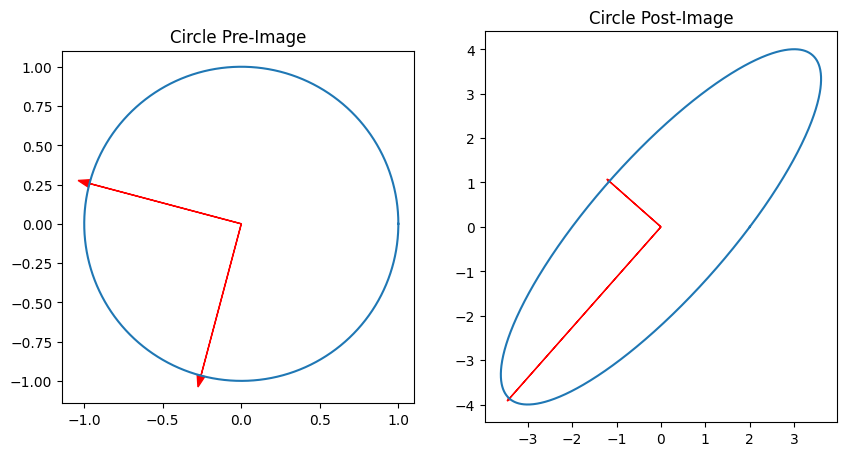

In [36]:
Image_points = E@circle
Eigen_image = E@E_eigenvecs

figure3,axis3 = plt.subplots(1,2,figsize=(10,6))

# Add plots
axis3[0].plot(circle[0],circle[1])
axis3[1].plot(Image_points[0],Image_points[1])

# Set aspect ratio
axis3[0].set_aspect('equal')
axis3[1].set_aspect('equal')

# Set titles
axis3[0].set_title("Circle Pre-Image")
axis3[1].set_title("Circle Post-Image")

# Vectors
axis3[0].arrow(0,0,E_eigenvecs[0,0],E_eigenvecs[1,0],color='r',head_width=0.05)
axis3[0].arrow(0,0,E_eigenvecs[0,1],E_eigenvecs[1,1],color='r',head_width=0.05)
axis3[1].arrow(0,0,Eigen_image[0,0],Eigen_image[1,0],color='r',head_width=0.05)
axis3[1].arrow(0,0,Eigen_image[0,1],Eigen_image[1,1],color='r',head_width=0.05);
figure3.savefig("svd_nn_case.png")

In [33]:
U = normalize(Eigen_image)
Sigma = np.sqrt(np.diag(E_eignvals))
V = E_eigenvecs
print(U@Sigma@V.transpose(),"\n")
for element in [U,Sigma,V]:
    print(element,"\n")


[[2. 3.]
 [0. 4.]] 

[[-0.74967818 -0.66180256]
 [ 0.66180256 -0.74967818]] 

[[1.55132633 0.        ]
 [0.         5.1568776 ]] 

[[-0.96649965 -0.25666794]
 [ 0.25666794 -0.96649965]] 



In [31]:
for element in la.svd(E):
    print(element,"\n")

[[ 0.66180256 -0.74967818]
 [ 0.74967818  0.66180256]] 

[5.1568776  1.55132633] 

[[ 0.25666794  0.96649965]
 [-0.96649965  0.25666794]] 

